<a href="https://colab.research.google.com/github/mushfiqurgalib/ImageProcessingProject/blob/main/lbp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math


img_bgr = cv2.imread('poseDetection.png', 1)

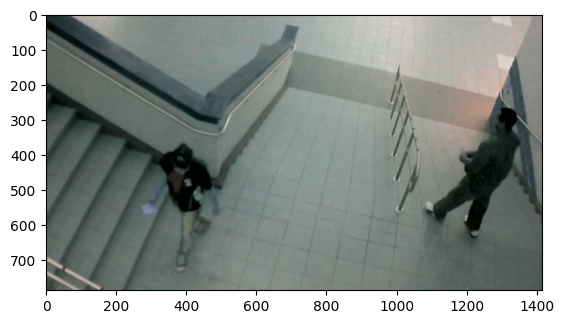

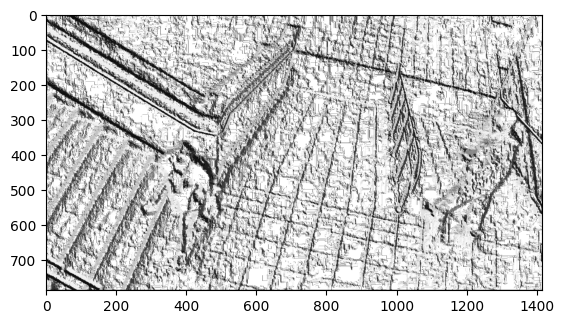

LBP Program is finished


In [12]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


def get_pixel(img, center, x, y):

	new_value = 0

	try:
		# If local neighbourhood pixel
		# value is greater than or equal
		# to center pixel values then
		# set it to 1
		if img[x][y] >= center:
			new_value = 1

	except:
		# Exception is required when
		# neighbourhood value of a center
		# pixel value is null i.e. values
		# present at boundaries.
		pass

	return new_value

# Function for calculating LBP
def lbp_calculated_pixel(img, x, y):

	center = img[x][y]

	val_ar = []

	# top_left
	val_ar.append(get_pixel(img, center, x-1, y-1))

	# top
	val_ar.append(get_pixel(img, center, x-1, y))

	# top_right
	val_ar.append(get_pixel(img, center, x-1, y + 1))

	# right
	val_ar.append(get_pixel(img, center, x, y + 1))

	# bottom_right
	val_ar.append(get_pixel(img, center, x + 1, y + 1))

	# bottom
	val_ar.append(get_pixel(img, center, x + 1, y))

	# bottom_left
	val_ar.append(get_pixel(img, center, x + 1, y-1))

	# left
	val_ar.append(get_pixel(img, center, x, y-1))

	# Now, we need to convert binary
	# values to decimal
	power_val = [1, 2, 4, 8, 16, 32, 64, 128]

	val = 0

	for i in range(len(val_ar)):
		val += val_ar[i] * power_val[i]

	return val



height, width, _ = img_bgr.shape
img_gray = cv2.cvtColor(img_bgr,
                        cv2.COLOR_BGR2GRAY)

# We need to convert RGB image
# into gray one because gray
# image has one channel only.
img_gray = cv2.cvtColor(img_bgr,
						cv2.COLOR_BGR2GRAY)

# Create a numpy array as
# the same height and width
# of RGB image
img_lbp = np.zeros((height, width),
				np.uint8)

for i in range(0, height):
	for j in range(0, width):
		img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

plt.imshow(img_bgr)
plt.show()

plt.imshow(img_lbp, cmap ="gray")
plt.show()

print("LBP Program is finished")
